In [2]:
#import libraries 
import numpy as np 
import pandas as pd
import pickle
from textblob import TextBlob
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from nltk.tokenize import word_tokenize
import docx2txt
from nltk.text import Text 

In [3]:
#import recipes dataset

In [4]:
food=pd.read_csv('RAW_recipes.csv')
food.head(5)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [5]:
#check data

In [6]:
food["steps"]

0         ['make a choice and proceed with recipe', 'dep...
1         ['preheat oven to 425 degrees f', 'press dough...
2         ['brown ground beef in large pot', 'add choppe...
3         ['place potatoes in a large pot of lightly sal...
4         ['mix all ingredients& boil for 2 1 / 2 hours ...
                                ...                        
231632    ['heat oil in a 4-quart dutch oven', 'add cele...
231633          ['mix all ingredients together thoroughly']
231634    ['in a bowl , combine the mashed yolks and may...
231635    ['place melted butter in a large mixing bowl a...
231636    ['whip sugar and shortening in a large bowl , ...
Name: steps, Length: 231637, dtype: object

In [7]:
food["tags"]


0         ['60-minutes-or-less', 'time-to-make', 'course...
1         ['30-minutes-or-less', 'time-to-make', 'course...
2         ['time-to-make', 'course', 'preparation', 'mai...
3         ['60-minutes-or-less', 'time-to-make', 'course...
4         ['weeknight', 'time-to-make', 'course', 'main-...
                                ...                        
231632    ['ham', '60-minutes-or-less', 'time-to-make', ...
231633    ['15-minutes-or-less', 'time-to-make', 'course...
231634    ['60-minutes-or-less', 'time-to-make', 'course...
231635    ['30-minutes-or-less', 'time-to-make', 'course...
231636    ['30-minutes-or-less', 'time-to-make', 'course...
Name: tags, Length: 231637, dtype: object

In [8]:
food["description"]


0         autumn is my favorite time of year to cook! th...
1         this recipe calls for the crust to be prebaked...
2         this modified version of 'mom's' chili was a h...
3         this is a super easy, great tasting, make ahea...
4         my dh's amish mother raised him on this recipe...
                                ...                        
231632    this is a delicious soup that i originally fou...
231633      this spice mix will make your taste buds dance!
231634                            deviled eggs, cajun-style
231635    i've heard of the 'cookies by design' company,...
231636    i've heard of the 'cookies by design' company,...
Name: description, Length: 231637, dtype: object

In [9]:
food["ingredients"]

0         ['winter squash', 'mexican seasoning', 'mixed ...
1         ['prepared pizza crust', 'sausage patty', 'egg...
2         ['ground beef', 'yellow onions', 'diced tomato...
3         ['spreadable cheese with garlic and herbs', 'n...
4         ['tomato juice', 'apple cider vinegar', 'sugar...
                                ...                        
231632    ['celery', 'onion', 'green sweet pepper', 'gar...
231633    ['paprika', 'salt', 'garlic powder', 'onion po...
231634    ['hard-cooked eggs', 'mayonnaise', 'dijon must...
231635    ['butter', 'eagle brand condensed milk', 'ligh...
231636    ['granulated sugar', 'shortening', 'eggs', 'fl...
Name: ingredients, Length: 231637, dtype: object

In [10]:
# show the dataframe info

In [11]:
food.shape

(231637, 12)

In [12]:
food.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [13]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [14]:
food.columns.to_list()

['name',
 'id',
 'minutes',
 'contributor_id',
 'submitted',
 'tags',
 'nutrition',
 'n_steps',
 'steps',
 'description',
 'ingredients',
 'n_ingredients']

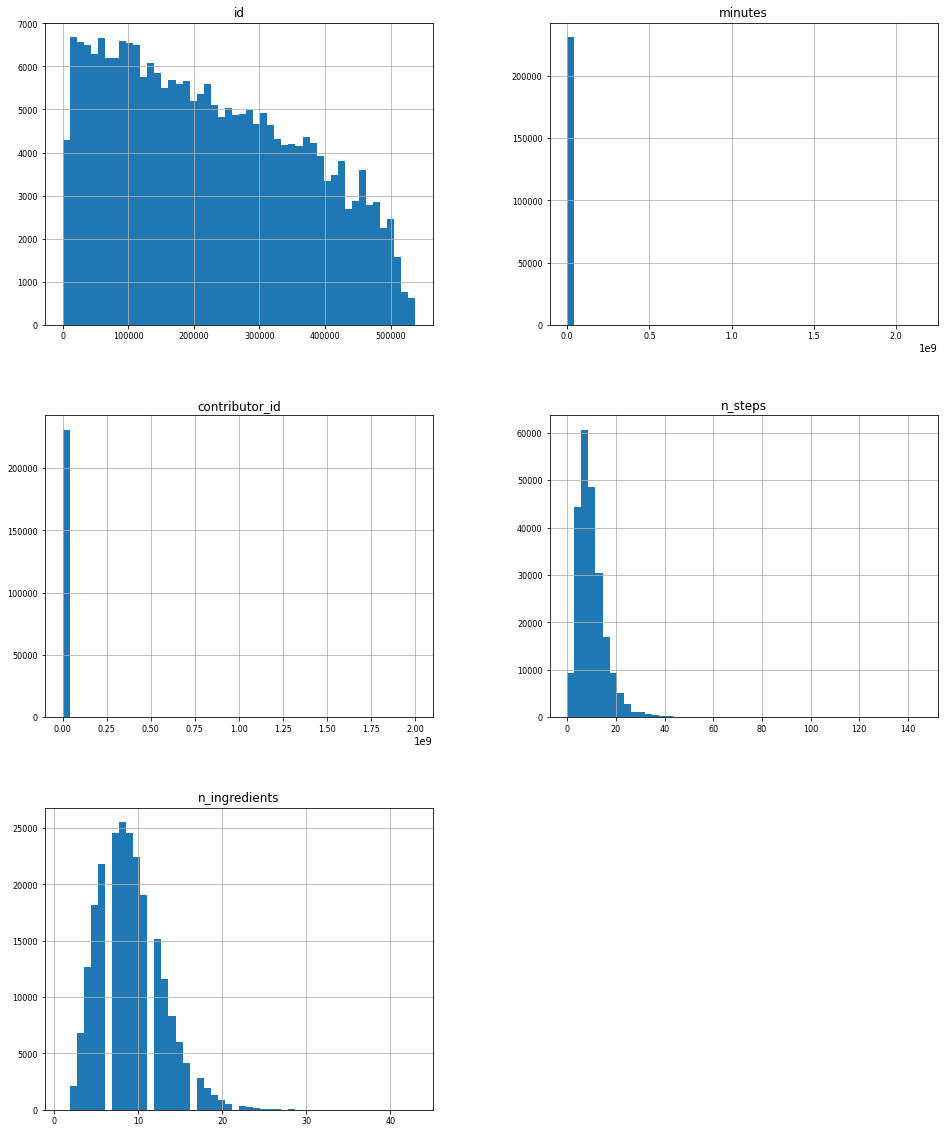

In [15]:
food.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);


In [16]:
# drop nulls. 


In [17]:
food=food.dropna()


In [18]:
food.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
description       0
ingredients       0
n_ingredients     0
dtype: int64

In [19]:
food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226657 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            226657 non-null  object
 1   id              226657 non-null  int64 
 2   minutes         226657 non-null  int64 
 3   contributor_id  226657 non-null  int64 
 4   submitted       226657 non-null  object
 5   tags            226657 non-null  object
 6   nutrition       226657 non-null  object
 7   n_steps         226657 non-null  int64 
 8   steps           226657 non-null  object
 9   description     226657 non-null  object
 10  ingredients     226657 non-null  object
 11  n_ingredients   226657 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 22.5+ MB


In [19]:
food.shape

(226657, 12)

In [20]:
#remove double space 

In [21]:
#df.postcode = df.postcode.str.replace(' +', ' ')
food.name = food.name.str.replace(' +', ' ')

<ipython-input-21-0806ee4a37f6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  food.name = food.name.str.replace(' +', ' ')


In [22]:
food.steps = food.steps.str.replace(' +', ' ')

<ipython-input-22-c1009120ee27>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  food.steps = food.steps.str.replace(' +', ' ')


In [23]:
#drop column

In [24]:
#food.drop(['contributor_id', 'submitted'], axis=1, inplace=True)

In [25]:
#food.head()

In [26]:
# separate nutrition column to calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)' and drop 'nutrition'


In [27]:
food[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = food.nutrition.str.split(",",expand=True) 


In [28]:
food['calories'] =  food['calories'].apply(lambda x: x.replace('[','')) 

In [29]:
food['carbohydrates (PDV)'] =  food['carbohydrates (PDV)'].apply(lambda x: x.replace(']','')) 

In [30]:
food[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']] = food[['calories','total fat (PDV)','sugar (PDV)','sodium (PDV)','protein (PDV)','saturated fat (PDV)','carbohydrates (PDV)']].astype('float')


In [31]:
food.drop(['nutrition'], axis=1, inplace=True)

In [32]:
food.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0


In [33]:
#lowercase data

In [34]:
food.columns = [column.lower() for column in food.columns]

In [ ]:
#add cousine for classification 

In [35]:
food.loc[food['tags'].str.contains("italian"),'cousine'] = 'italian'
food.loc[food['tags'].str.contains("french"),'cousine'] = 'french'
food.loc[food['tags'].str.contains("chinese"),'cousine'] = 'chinese'
food.loc[food['tags'].str.contains("mexican"),'cousine'] = 'mexican'
food.loc[food['tags'].str.contains("indian"),'cousine'] = 'indian'
food.loc[food['tags'].str.contains("american"),'cousine'] = 'american'
food.loc[food['tags'].str.contains("georgian"),'cousine'] = 'georgian'
food.loc[food['tags'].str.contains("spanish"),'cousine'] = 'spanish'
food.loc[food['tags'].str.contains("german"),'cousine'] = 'german'
food.loc[food['tags'].str.contains("turkish"),'cousine'] = 'turkish'
food.loc[food['tags'].str.contains("japan"),'cousine'] = 'japan'

In [ ]:
#add type for classification

In [36]:
food['t_dessert'] = ['dessert' in tag for tag in food['tags']]
food['t_breakfast'] = ['breakfast' in tag for tag in food['tags']]
food['t_snacks'] = ['snack' in tag for tag in food['tags']]
food['t_main'] = ['main' in tag for tag in food['tags']]
food['t_side'] = ['side' in tag for tag in food['tags']]
food['t_lunch'] = ['lunch' in tag for tag in food['tags']]
food['t_dinner'] = ['dinner' in tag for tag in food['tags']]
food['t_salad'] = ['salad' in tag for tag in food['tags']]
food['t_spicy'] = ['spicy' in tag for tag in food['tags']]





In [ ]:
#add vegatarian food for classification

In [37]:
food['vegetarian'] = ['vegetarian' in tag for tag in food['tags']]
food.head(5)


,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_dessert,t_breakfast,t_snacks,t_main,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,False,False,True,True,False,False,False,False,True
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,False,True,False,True,False,False,False,False,False,False
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,False,False,False,True,False,False,False,False,False,False
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,False,False,False,True,True,False,True,False,False,False
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,False,False,False,True,False,False,False,False,False,True


In [ ]:
#add col difficulty for classification

In [38]:
conditions = [
    (food['n_steps'] < 10),
    (food['n_steps'] < 20) & (food['n_steps'] >= 10),
    (food['n_steps'] >= 20)
    ]

values = ['easy', 'medium', 'difficult']

food['difficulty'] = np.select(conditions, values)

food.head()


,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_breakfast,t_snacks,t_main,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,False,True,True,False,False,False,False,True,medium
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,True,False,True,False,False,False,False,False,False,easy
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,False,False,True,False,False,False,False,False,False,easy
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,False,False,True,True,False,True,False,False,False,medium
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,False,False,True,False,False,False,False,False,True,easy


In [ ]:
#add col quick or long for classification

In [40]:
conditions = [
    (food['minutes'] <= 30),
    (food['minutes'] > 30)
    ]

values = ['quick', 'long']

food['quick'] = np.select(conditions, values)

food.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_snacks,t_main,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,True,True,False,False,False,False,True,medium,long


In [ ]:
#add col calories for classification

In [41]:
conditions = [
    (food['calories'] <= 200),
    (food['calories'] > 200)
    ]

values = ['low_calorie', 'no']

food['low_calorie'] = np.select(conditions, values)

food.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_main,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,True,True,False,False,False,False,True,medium,long,low_calorie


---

In [20]:
#import review dataset
review=pd.read_csv('RAW_interactions.csv')
review.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [21]:
review.head(5)

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [23]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [44]:
# change id column name
review=review.rename({'recipe_id' : 'id'}, axis=1)


In [45]:
review

,user_id,id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [46]:
#group rating by mean

In [47]:
rating=review.groupby(['id']).agg({'rating':'mean'})

In [48]:
rating.head()

,rating
id,
38,4.250000
39,3.000000
40,4.333333
41,4.500000
43,1.000000


In [49]:
newfood = pd.merge(food, rating, on='id')
newfood.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie,rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,True,False,False,False,False,True,medium,long,low_calorie,5.0


In [50]:
newfood=newfood.rename({'rating' : 'rating_mean'}, axis=1)
newfood.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie,rating_mean
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,True,False,False,False,False,True,medium,long,low_calorie,5.0


In [51]:
#group rating  sum

In [52]:
rating2=review.groupby(['id']).agg({'rating':'sum'})

In [53]:
rating2.head()

,rating
id,
38,17
39,3
40,39
41,9
43,1


In [54]:
newfood = pd.merge(newfood, rating2, on='id')
newfood.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie,rating_mean,rating
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,False,False,False,True,medium,long,low_calorie,5.0,15


In [55]:
newfood=newfood.rename({'rating' : 'rating_sum'}, axis=1)


In [56]:
newfood.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie,rating_mean,rating_sum
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,False,False,False,True,medium,long,low_calorie,5.0,15


In [57]:
#review sentiment

In [58]:
from textblob import TextBlob 

In [59]:
review

,user_id,id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [60]:
review.drop(['user_id', 'date', 'rating' ], axis = 1, inplace = True) 


In [61]:
review

,id,review
0,40893,Great with a salad. Cooked on top of stove for...
1,40893,"So simple, so delicious! Great for chilly fall..."
2,44394,This worked very well and is EASY. I used not...
3,85009,I made the Mexican topping and took it to bunk...
4,85009,"Made the cheddar bacon topping, adding a sprin..."
...,...,...
1132362,72730,Another approach is to start making sauce with...
1132363,386618,These were so delicious! My husband and I tru...
1132364,78003,WOW! Sometimes I don't take the time to rate ...
1132365,78003,Very good! I used regular port as well. The ...


In [62]:
review.dropna(subset=['review','id'], inplace=True)


In [63]:
review.reset_index(drop=True, inplace=True)

In [64]:
review['sentiment']=review['review'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [65]:
#review_sent=review.groupby(['id']).agg({'rating':'mean'})

In [66]:
review['sentiment']

0          0.270000
1          0.242857
2          0.366667
3          0.350000
4         -0.208333
             ...   
1132193    0.300000
1132194    0.339904
1132195    0.463068
1132196    0.575000
1132197    0.491667
Name: sentiment, Length: 1132198, dtype: float64

In [67]:
review5= TextBlob(review.at[5, 'review'])
review5

TextBlob("very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo.")

In [68]:
review.head(1)

,id,review,sentiment
0,40893,Great with a salad. Cooked on top of stove for...,0.27


In [69]:
review_5= TextBlob(review.at[4, 'review'])
review_5

TextBlob("Made the cheddar bacon topping, adding a sprinkling of black pepper. Yum!")

In [70]:
rev_sent=review.groupby(['id']).agg({'sentiment':'mean'})

In [71]:
review7= TextBlob(review.at[231628, 'review'])
review7  
    

TextBlob("Love this Recipe!!!can you say Yummy Yum Yum;) i used lime juice instead of vinegar and made a Salad dressing for my Greens...Delishhhhhh...")

In [72]:
rev_sent

,sentiment
id,
38,0.397917
39,0.050000
40,0.397198
41,0.516250
43,0.000000
...,...
537459,0.350000
537485,0.316667
537543,0.833333


In [73]:
newfood = pd.merge(newfood, rev_sent, on='id')
newfood.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie,rating_mean,rating_sum,sentiment
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,False,False,False,True,medium,long,low_calorie,5.0,15,0.333095


In [74]:
newfood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226650 entries, 0 to 226649
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 226650 non-null  object 
 1   id                   226650 non-null  int64  
 2   minutes              226650 non-null  int64  
 3   contributor_id       226650 non-null  int64  
 4   submitted            226650 non-null  object 
 5   tags                 226650 non-null  object 
 6   n_steps              226650 non-null  int64  
 7   steps                226650 non-null  object 
 8   description          226650 non-null  object 
 9   ingredients          226650 non-null  object 
 10  n_ingredients        226650 non-null  int64  
 11  calories             226650 non-null  float64
 12  total fat (pdv)      226650 non-null  float64
 13  sugar (pdv)          226650 non-null  float64
 14  sodium (pdv)         226650 non-null  float64
 15  protein (pdv)    

In [75]:
#newfood.to_csv('newfood_monday.csv')


In [76]:
newfood.drop(['n_ingredients',  ], axis=1, inplace=True)

In [77]:
food.head(1)

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,t_main,t_side,t_lunch,t_dinner,t_salad,t_spicy,vegetarian,difficulty,quick,low_calorie
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,True,True,False,False,False,False,True,medium,long,low_calorie


In [78]:
newfood.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226650 entries, 0 to 226649
Data columns (total 34 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 226650 non-null  object 
 1   id                   226650 non-null  int64  
 2   minutes              226650 non-null  int64  
 3   contributor_id       226650 non-null  int64  
 4   submitted            226650 non-null  object 
 5   tags                 226650 non-null  object 
 6   n_steps              226650 non-null  int64  
 7   steps                226650 non-null  object 
 8   description          226650 non-null  object 
 9   ingredients          226650 non-null  object 
 10  calories             226650 non-null  float64
 11  total fat (pdv)      226650 non-null  float64
 12  sugar (pdv)          226650 non-null  float64
 13  sodium (pdv)         226650 non-null  float64
 14  protein (pdv)        226650 non-null  float64
 15  saturated fat (pd

In [80]:
#export new data
newfood.to_csv('newfood_monday.csv')


In [ ]:
#newfood.to_excel('newfood_monday.xlsx', index = False)
